In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy

d:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.__version__

'2.10.0'

In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
(X_train , y_train) , (X_test , y_test) = keras.datasets.cifar10.load_data()

In [6]:
len(X_train),len(X_test)

(50000, 10000)

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_train[0][0].shape

(32, 3)

In [9]:
X_train[0][0][31]

array([148, 124, 103], dtype=uint8)

In [10]:
X_train[0].shape

(32, 32, 3)

In [11]:
classes = ["airplane","automobile", "bird", "cat", "deer", "dog", "Frog", "horse", "ship", "truck"]

In [12]:
def plot(index):
    plt.figure(figsize=(6,6))
    plt.matshow(X_train[index])
    print(classes[y_train[index][0]])

Frog


<Figure size 432x432 with 0 Axes>

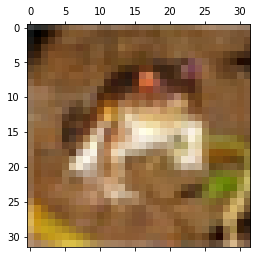

In [13]:
plot(0)

In [14]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [15]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [16]:
from tensorflow.keras.utils import to_categorical

y_train_dummy = to_categorical(y_train,num_classes=10,dtype='float32')
y_test_dummy = to_categorical(y_test,num_classes=10,dtype='float32')

y_train_dummy[:5],y_test_dummy[:5]

(array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [18]:
def get_model():
    model = Sequential([
        Flatten(input_shape=(32,32,3)),
        Dense(3000,activation='relu'),
        Dense(1000,activation='relu'),
        Dense(10,activation='sigmoid')
    ])
    
    model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [30]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    model_gpu = get_model()
    model_gpu.fit(X_train_scaled,y_train_dummy,epochs=1)
print(np.argmax(model_gpu.predict(X_test_scaled)[0]))

313/313 [==============================] - 1s 2ms/step
3
12.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [19]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model_cpu = get_model()
    model_cpu.fit(X_train_scaled,y_train_dummy,epochs=1)

1563/1563 [==============================] - 83s 52ms/step - loss: 1.8129 - accuracy: 0.3552
1min 26s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Exercise model

In [ ]:
def get_exercise_model():
    model = Sequential([
        Flatten(input_shape=(32,32,3)),
        Dense(3000,activation='relu'),
        Dense(1000,activation='relu'),
        Dense(10,activation='sigmoid')
    ])
    
    model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model